ROOT Keys: ['DF_2424272862165760;1', 'DF_2424272862165760/O2hfcredassocbase;1', 'DF_2424272862165760/O2hfcredassoctrk;1', 'DF_2424272862165760/O2hfcredcorrcoll;1', 'DF_2424272862165760/O2hfcredsebase;1', 'DF_2424272862165760/O2hfcredtrigbase;1', 'DF_2424272862165760/O2hfcredtrigcharm;1', 'DF_2424272862165760/O2hfcredtrigtrk;1', 'parentFiles;1']
Reading DF_2424272862165760/O2hfcredcorrcoll;1

Table: O2hfcredcorrcoll
Number of entries: 2016
Columns: ['fMultiplicity', 'fNumPvContrib', 'fCentrality', 'fPosZ']
Plotting fMultiplicity
Plotting fNumPvContrib
Plotting fCentrality
Plotting fPosZ


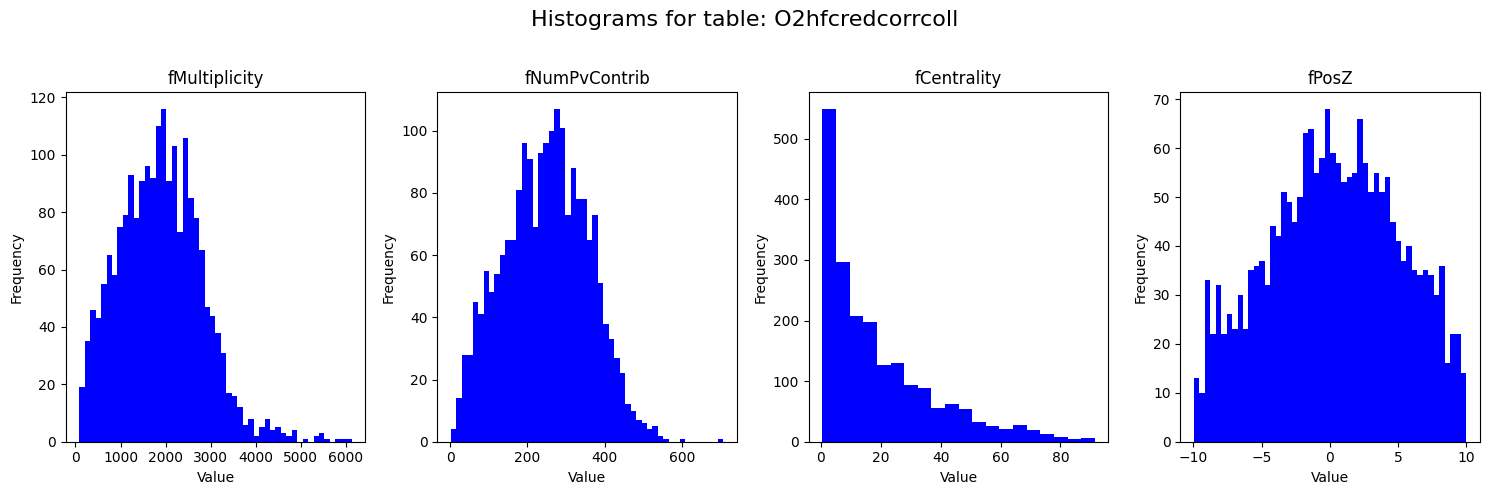

Reading DF_2424272862165760/O2hfcredsebase;1
Empty DataFrame for key: DF_2424272862165760/O2hfcredsebase;1

Table: O2hfcredsebase
Number of entries: 0
Columns: ['fIndexHfcRedCorrColls', 'fPtTrig', 'fPtAssoc', 'fDeltaEta', 'fDeltaPhi']
Plotting fIndexHfcRedCorrColls
Plotting fPtTrig
Plotting fPtAssoc
Plotting fDeltaEta
Plotting fDeltaPhi


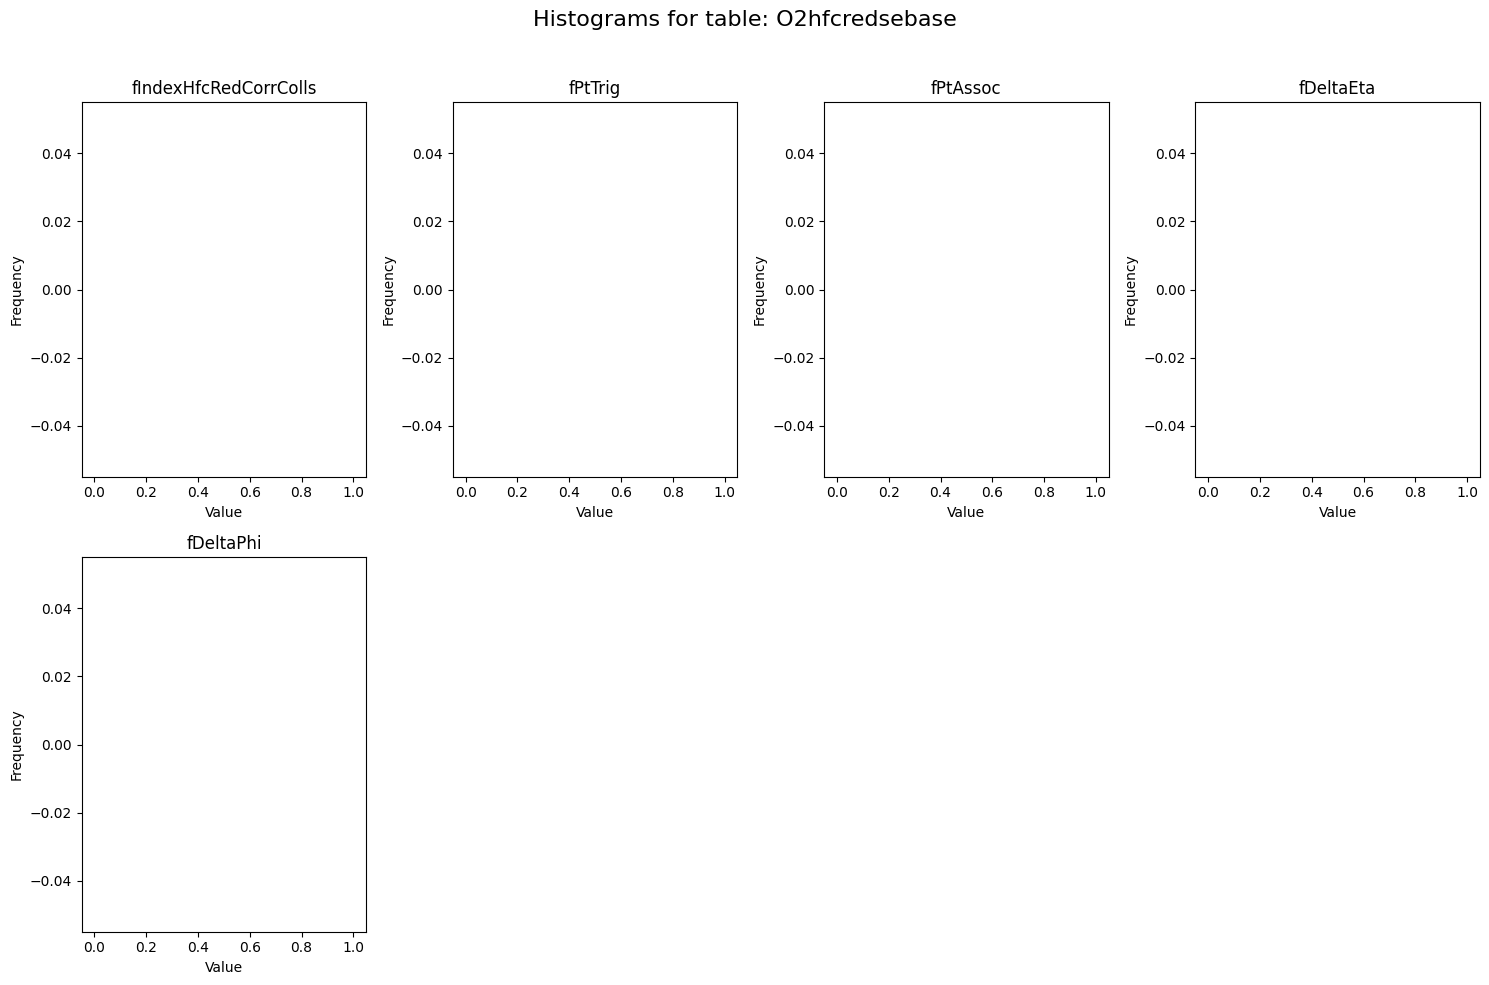

Reading DF_2424272862165760/O2hfcredassocbase;1

Table: O2hfcredassocbase
Number of entries: 13967
Columns: ['fIndexHfcRedCorrColls', 'fPhiAssoc', 'fEtaAssoc', 'fPtAssoc']
Plotting fIndexHfcRedCorrColls
Plotting fPhiAssoc
Plotting fEtaAssoc
Plotting fPtAssoc


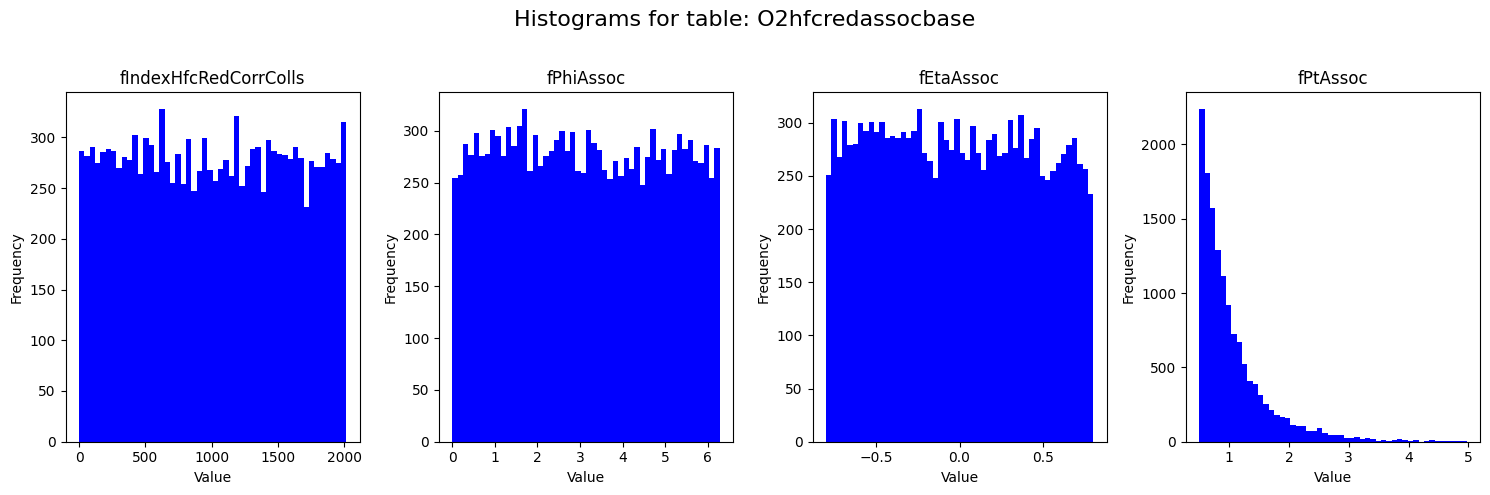

Reading DF_2424272862165760/O2hfcredassoctrk;1

Table: O2hfcredassoctrk
Number of entries: 13967
Columns: ['fNTpcCrossedRowsAssoc', 'fItsClsMapAssoc', 'fItsNClsAssoc', 'fDcaXYAssoc', 'fDcaZAssoc']
Plotting fNTpcCrossedRowsAssoc
Plotting fItsClsMapAssoc
Plotting fItsNClsAssoc
Plotting fDcaXYAssoc
Plotting fDcaZAssoc


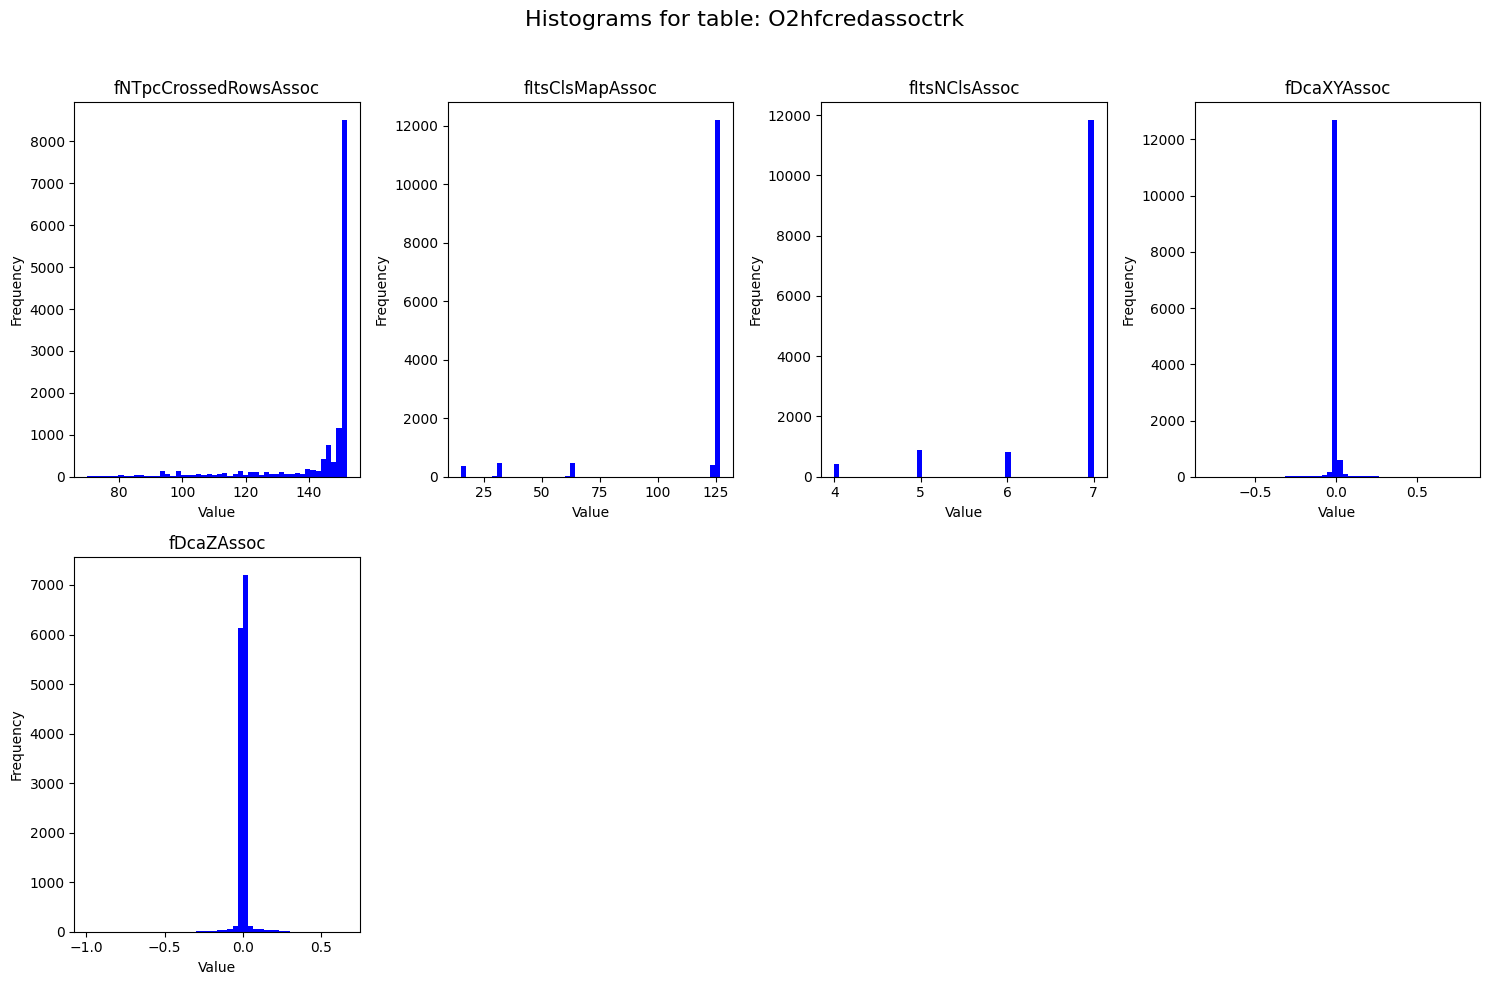

Reading DF_2424272862165760/O2hfcredtrigbase;1

Table: O2hfcredtrigbase
Number of entries: 2542
Columns: ['fIndexHfcRedCorrColls', 'fPhiTrig', 'fEtaTrig', 'fPtTrig']
Plotting fIndexHfcRedCorrColls
Plotting fPhiTrig
Plotting fEtaTrig
Plotting fPtTrig


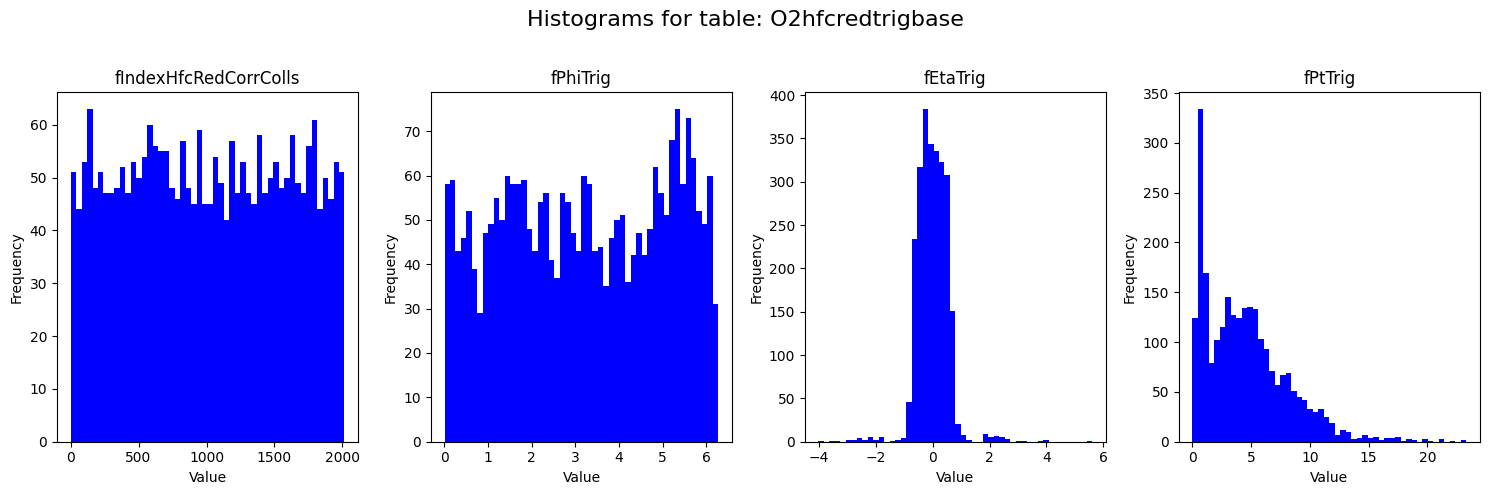

Reading DF_2424272862165760/O2hfcredtrigcharm;1

Table: O2hfcredtrigcharm
Number of entries: 2542
Columns: ['fInvMassTrig', 'fBdtScore0Trig', 'fBdtScore1Trig']
Plotting fInvMassTrig
Plotting fBdtScore0Trig
Plotting fBdtScore1Trig


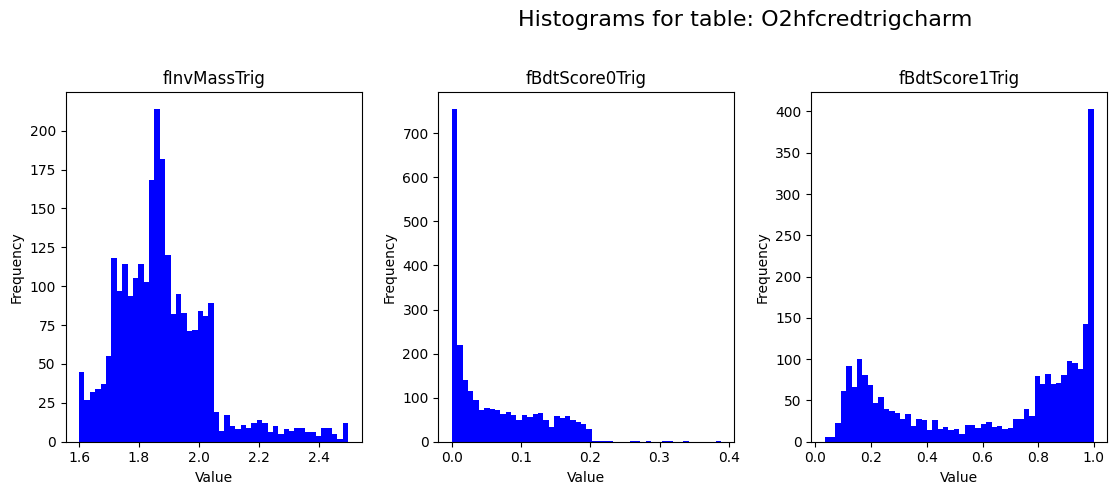

Reading DF_2424272862165760/O2hfcredtrigtrk;1
Empty DataFrame for key: DF_2424272862165760/O2hfcredtrigtrk;1

Table: O2hfcredtrigtrk
Number of entries: 0
Columns: ['fNTpcCrossedRowsTrig', 'fItsClsMapTrig', 'fItsNClsTrig', 'fDcaXYTrig', 'fDcaZTrig']
Plotting fNTpcCrossedRowsTrig
Plotting fItsClsMapTrig
Plotting fItsNClsTrig
Plotting fDcaXYTrig
Plotting fDcaZTrig


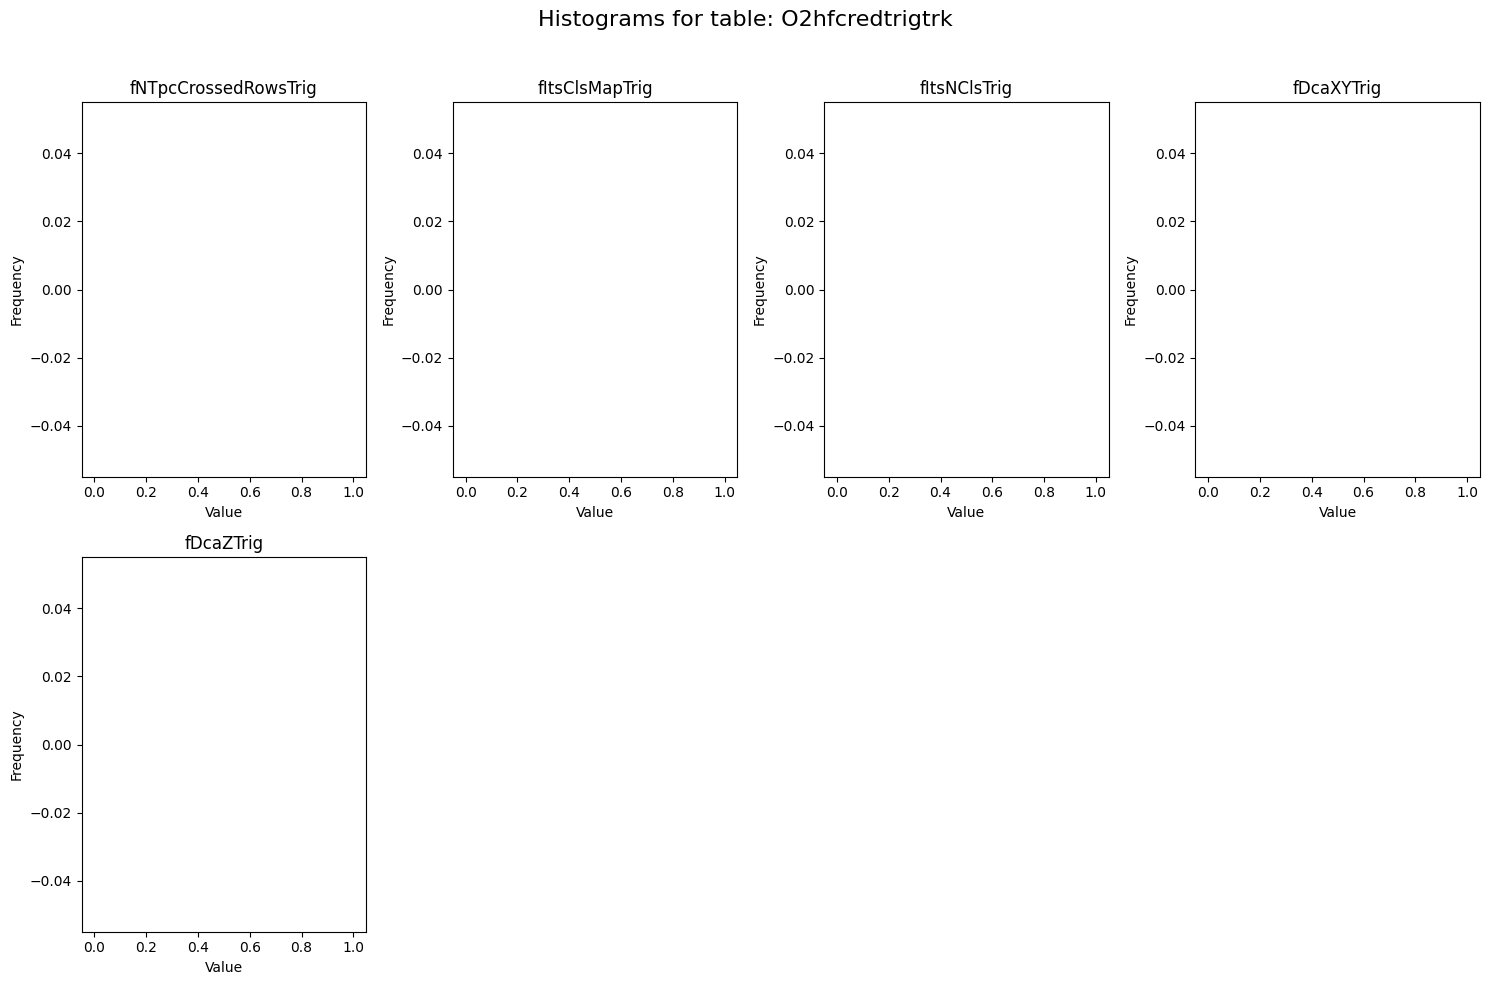

In [3]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import awkward as ak

tables = [
    "O2hfcredcorrcoll",
    "O2hfcredsebase",
    "O2hfcredassocbase",
    "O2hfcredassoctrk",
    "O2hfcredtrigbase",
    "O2hfcredtrigcharm",
    "O2hfcredtrigtrk",
]

with uproot.open("Tree.root") as f:
    keys = f.keys()
    print("ROOT Keys:", keys)
    
    for table in tables:
        # Filter keys that match the table name
        matched_keys = [key for key in keys if table in key]
        
        if not matched_keys:
            print(f"No keys found for table: {table}")
            continue
        
        dfs = []
        for key in matched_keys:
            print(f"Reading {key}")
            array = f[key].arrays(library="ak")  # get awkward array
            df = ak.to_dataframe(array)          # convert to pandas DataFrame
            if (len(df) == 0):
                print(f"Empty DataFrame for key: {key}")
            dfs.append(df)
        
        full_df = pd.concat(dfs, ignore_index=True)
        print(f"\nTable: {table}")
        print(f"Number of entries: {len(full_df)}")
        print(f"Columns: {full_df.columns.tolist()}")
        
        # Plotting
        n_columns = len(full_df.columns)
        n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)
        
        fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
        axes = axes.flatten()

        for i, column in enumerate(full_df.columns):
            print(f"Plotting {column}")
            try:
                if 'Centrality' in column:
                    axes[i].hist(full_df[column].dropna(), bins=20, color='blue')
                else:
                    axes[i].hist(full_df[column].dropna(), bins=50, color='blue')
                axes[i].set_title(f'{column}')
                axes[i].set_xlabel('Value')
                axes[i].set_ylabel('Frequency')
                # axes[i].set_yscale('log')
                # axes[i].set_yscale('log')
            except Exception as e:
                print(f"Could not plot column {column}: {e}")
                axes[i].set_visible(False)
        
        # Remove unused axes if any
        for i in range(n_columns, len(axes)):
            fig.delaxes(axes[i])
        
        fig.suptitle(f"Histograms for table: {table}", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
